<a href="https://colab.research.google.com/github/Rahul4269/Assignments/blob/main/ML_Combined_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML_Combined_Assignment-1**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
with open("/content/nba_2013.csv",'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [ ]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [ ]:
nba.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [ ]:
nba.describe()


,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,481.000000,481.000000,478.000000,479.000000,481.000000,481.000000,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,147.223161,294.174554,0.104448,0.099552,103.667725,131.240639,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,31.000000,67.000000,0.434719,0.451000,16.000000,22.000000,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,110.000000,227.000000,0.474475,0.488000,53.000000,73.000000,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,230.000000,459.000000,0.513729,0.526000,126.000000,179.000000,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [ ]:
nba.shape


(481, 31)

In [ ]:
nba.isna().sum()


player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [ ]:
nba.dtypes


player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [ ]:
nba['fg.'].fillna(nba['fg.'].median(),inplace=True)
nba['x3p.'].fillna(nba['x3p.'].median(),inplace=True)
nba['x2p.'].fillna(nba['x2p.'].median(),inplace=True)
nba['efg.'].fillna(nba['efg.'].median(),inplace=True)
nba['ft.'].fillna(nba['ft.'].median(),inplace=True)

In [ ]:
nba.duplicated().any()

False

In [ ]:
nba.drop('player',axis=1,inplace=True)
nba.drop('bref_team_id',axis=1,inplace=True)
nba.drop('season',axis=1,inplace=True)
nba.drop('season_end', axis=1, inplace=True)

In [ ]:
nba.columns

Index(['pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
       'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [ ]:
nba['pos'].value_counts()


SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

In [ ]:
new_pos = pd.get_dummies(nba['pos'],prefix='pos',drop_first=True)
new_pos.head()

,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,0,0,0,0,1,0
1,0,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0


In [ ]:
nba.drop('pos',axis=1,inplace=True)


In [ ]:
nba.head()


,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.330976,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.330976,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328


In [ ]:
df = pd.concat([nba,new_pos],axis=1)


In [ ]:
df.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.330976,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.330976,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,0,0,0,0,0,0


In [ ]:
df.dtypes

age         int64
g           int64
gs          int64
mp          int64
fg          int64
fga         int64
fg.       float64
x3p         int64
x3pa        int64
x3p.      float64
x2p         int64
x2pa        int64
x2p.      float64
efg.      float64
ft          int64
fta         int64
ft.       float64
orb         int64
drb         int64
trb         int64
ast         int64
stl         int64
blk         int64
tov         int64
pf          int64
pts         int64
pos_F       uint8
pos_G       uint8
pos_PF      uint8
pos_PG      uint8
pos_SF      uint8
pos_SG      uint8
dtype: object

In [ ]:
X = df.drop('pts',axis=1)
y = df['pts']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knr.score(x_test,y_test)

0.9795107093730114

In [ ]:
y_pred = knr.predict(x_test)


In [ ]:
from sklearn.metrics import mean_squared_error
print(f'MSE:{mean_squared_error(y_test,y_pred)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}')

MSE:4080.937103448275
RMSE:63.88221273130945


In [ ]:
data = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})
data

,Actual Points,Predicted Points
0,587,623.2
1,89,98.8
2,350,325.2
3,1417,1350.6
4,1071,1081.4
...,...,...
140,525,552.0
141,197,203.4
142,138,171.0
143,1330,1229.4


In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_norm = norm.fit_transform(X)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.3,random_state=42)


In [ ]:
knr_norm = KNeighborsRegressor()
knr_norm.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knr_norm.score(x_test,y_test)


0.682008836094402

In [ ]:
y_new_pred = knr_norm.predict(x_test)


In [ ]:
print(f'MSE:{mean_squared_error(y_test,y_new_pred)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_new_pred))}')

MSE:63335.620689655174
RMSE:251.66569231751708


In [ ]:
data = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_new_pred.tolist()})
data

,Actual Points,Predicted Points
0,587,643.8
1,89,213.8
2,350,499.6
3,1417,875.4
4,1071,708.6
...,...,...
140,525,484.8
141,197,358.0
142,138,264.6
143,1330,1091.4


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)


In [ ]:
knr_scaled = KNeighborsRegressor()
knr_scaled.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knr_scaled.score(x_test,y_test)

0.9610799714089038

In [ ]:
y_pred_2 = knr_scaled.predict(x_test)


In [ ]:
print(f'MSE:{mean_squared_error(y_test,y_pred_2)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test,y_pred_2))}')

MSE:7751.863724137931
RMSE:88.0446689137845


In [ ]:
#Actual Vs Predicted
data = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred_2.tolist()})
data

,Actual Points,Predicted Points
0,587,475.2
1,89,172.6
2,350,350.0
3,1417,1512.6
4,1071,922.6
...,...,...
140,525,664.4
141,197,234.4
142,138,146.0
143,1330,1191.0


**In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.**

In [ ]:
from bs4 import BeautifulSoup
import urllib
import nltk
import requests
import re

In [ ]:
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/Avengers:_Endgame')
html = response.read()
raw = BeautifulSoup(html,"html5lib").get_text()

In [ ]:
nltk.download('punkt')
words = nltk.word_tokenize(raw)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
words = [word for word in words if len(word) > 1]

# Removing any numbers present in our text

words = [word for word in words if not word.isnumeric()]

# Lowercase all words (default_stopwords are lowercase too)

words = [word.lower() for word in words]

# Calculating frequency distribution

fdist = nltk.FreqDist(words)

# Printing the top 30 words with their frequency

for word, frequency in fdist.most_common(30):
    print(u'{}; {}'.format(word, frequency))

the; 1009
''; 935
``; 394
on; 313
and; 293
in; 291
from; 281
of; 278
to; 232
original; 220
april; 219
retrieved; 219
archived; 218
avengers; 216
endgame; 188
's; 179
film; 161
as; 139
may; 136
for; 113
with; 101
marvel; 97
'avengers; 91
was; 86
war; 84
that; 83
million; 79
it; 79
infinity; 79
films; 71


**In this assignment we have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

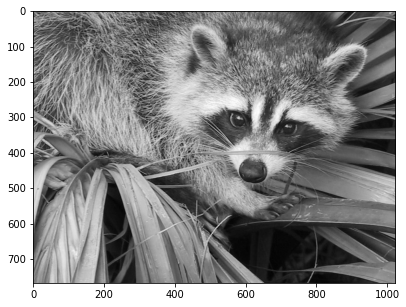

In [ ]:
Racoon = scipy.misc.face(gray=True)
plt.figure(figsize=(10,5))
plt.imshow(Racoon,plt.cm.gray)
plt.show()

In [ ]:
rows = Racoon.shape[0]
columns = Racoon.shape[1]
image = Racoon.reshape(rows*columns,1)

In [ ]:
Kmeans = KMeans(n_clusters=5)
Kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters = np.asarray(Kmeans.cluster_centers_)
labels = np.asarray(Kmeans.labels_)
labels = labels.reshape(rows,columns)

In [ ]:
plt.imsave('compressed_racoon.png',labels)

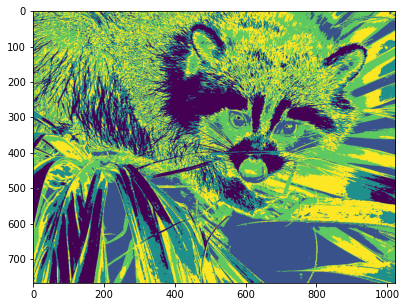

In [ ]:
image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10,5))
plt.imshow(image)
plt.show()

**In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X = df.iloc[:,:].values
y = df.iloc[:,4].values

In [ ]:
print(X.shape)
print(y.shape)

(150, 5)
(150,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()

In [ ]:
y = label_encoder_y.fit_transform(y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X = pca.fit_transform(X)

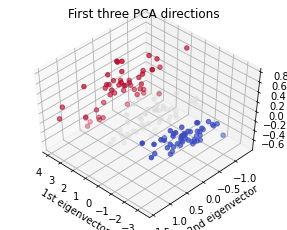

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.coolwarm)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])


ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

plt.show()

**In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('/content/sales-of-shampoo-over-a-three-ye.csv', header=0,parse_dates=True,index_col='Month')

In [ ]:
series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [ ]:
series = series.dropna()

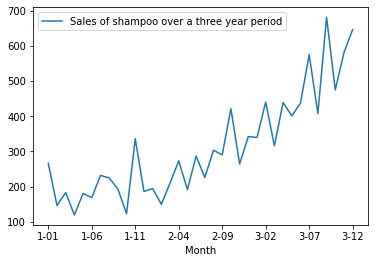

In [ ]:
series.plot()
plt.show()

In [ ]:
X = series.values

In [ ]:
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [ ]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [ ]:
train, test = X[0:size], X[size:len(X)]

In [ ]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted={yhat},Expected ={obs}')
error = mean_squared_error(test,predictions)
print(f"TEST MSE :{error}")

Predicted=[272.96448104],Expected =[421.6]
Predicted=[290.31376387],Expected =[264.5]
Predicted=[349.11770548],Expected =[342.3]
Predicted=[306.51297666],Expected =[339.7]
Predicted=[387.37638769],Expected =[440.4]
Predicted=[348.15419409],Expected =[315.9]
Predicted=[386.30876953],Expected =[439.3]
Predicted=[356.08196012],Expected =[401.3]
Predicted=[446.37950078],Expected =[437.4]
Predicted=[394.73727567],Expected =[575.5]
Predicted=[434.91550367],Expected =[407.6]
Predicted=[507.9233499],Expected =[682.]
Predicted=[435.48283227],Expected =[475.3]
Predicted=[652.7437651],Expected =[581.3]
Predicted=[546.34345239],Expected =[646.9]
TEST MSE :7547.810276069306


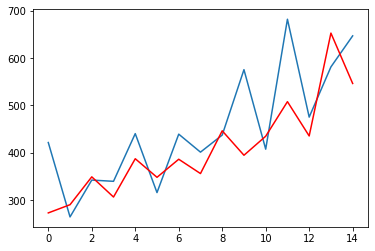

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()